# IMDB MOVIES DATASET ANALYSIS
# PHASE 2 PROJECT
# Business problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.
# The Data
In the folder zippedData are movie datasets from:

* Box Office Mojo 
* IMDB
* Rotten Tomatoes
* TheMovieDB
* The Numbers



# Key points
* The analysis should yield three concrete business recommendations.
* Effective data communication
* 3 Main visualizations

# Business Objectives

1. Produce Profitable Blockbuster Films

* Objective: Create highly marketable films with wide appeal, leveraging trends to achieve profitable box office and streaming revenue.
* KPI: Achieve at least 20% ROI on each film project within one year of release.


2. Optimize Production Costs and Budgets

* Objective: Establish a standardized budget and cost optimization framework to ensure cost-efficiency across productions.
* KPI: Keep production costs within 10% of the initial budget estimate.

3. Trend-Driven Content Development

* Objective: Develop a content pipeline that identifies, analyzes, and adapts current film trends to ensure audience interest and market relevance.
* KPI: Produce a minimum of three films per year inspired by top-performing genres or themes identified through trend analysis.



# Key Questions from Business Stakeholders
1. Content and Genre Trends

* What are the top-performing genres this year, and how have they shifted over recent years?
* How can we ensure that our content aligns with current audience preferences while still offering something unique?

2. Budget and Cost Management

* What is the projected budget for this film, and are there any opportunities to reduce costs without compromising quality?
* What are the financial risks involved if the film exceeds the budget?

3. Return on Investment (ROI) and Revenue Projections

* Based on similar past films, what is the expected ROI for this project?
* What revenue milestones should we set, and over what timeline?

In [3]:
# importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import statsmodels.api as sm
import zipfile
import os

# Loading the different datasets

In [7]:
# read movie_gross cleaned as a group
movie_gross= pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
movie_budget = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tn_movie_budgets.csv")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_details = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")
movie_details.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,19/11/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,26/03/2010,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,07/05/2010,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,22/11/1995,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,16/07/2010,Inception,8.3,22186


In [4]:
reviews = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.reviews.tsv", sep='\t', encoding='ISO-8859-1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
movie_info = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.movie_info.tsv", sep='\t', encoding='ISO-8859-1')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Checking for null values

In [9]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [13]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


- For the null values i decided not to drop or fill them because in movie data some things do not have every category filled or recorded.

# Focus Question 1
## Content and Genre Trends

* What are the top-performing genres this year, and how have they shifted over recent years?
* How can we ensure that our content aligns with current audience preferences while still offering something unique? 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the necessary data
bom_movie_gross = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")  # Adjust path as needed
rt_movie_info = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.movie_info.tsv", sep='\t')
tmdb_movies = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")

# Date parsing and genre processing
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(lambda x: x.strip('[]').split(','))  # Adjust if needed
tmdb_movies_exploded = tmdb_movies.explode('genre_ids')

# Calculate average popularity per genre per year
genre_trends = tmdb_movies_exploded.groupby(['release_year', 'genre_ids'])['popularity'].mean().unstack().fillna(0)

# Filter to top 10 genres based on the latest year
latest_year = genre_trends.index.max()
top_genres_latest_year = genre_trends.loc[latest_year].sort_values(ascending=False).head(10).index
top_10_genre_trends = genre_trends[top_genres_latest_year]

# Convert to long format for Plotly
top_10_genre_trends_long = top_10_genre_trends.reset_index().melt(id_vars='release_year', 
                                                                   var_name='Genre', 
                                                                   value_name='Popularity')

# Create interactive line plot with Plotly
fig = px.line(top_10_genre_trends_long, x='release_year', y='Popularity', color='Genre',
              title="Top 10 Genre Popularity Trends Over the Years")

# Show plot with interactive toggling capabilities
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6428\2251211134.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')


## Insights
1. Top-Performing Genres:

* The top-performing genres this year can be identified through their high popularity scores in the visualization. These genres are likely those currently drawing the most audience interest.
* A pattern of certain genres consistently appearing in the top 10 over recent years may indicate stable audience demand, suggesting that these genres have a broad and loyal viewership.

2. Shifting Popularity of Genres Over Time:

* Some genres may show rising popularity in recent years, while others may decline. For instance, if genres like Action and Sci-Fi show a steady increase in popularity, it may imply an expanding audience interest in high-adrenaline and futuristic themes.
* Genres with declining popularity should be reviewed to determine if they are worth investing in, as it could indicate a waning interest unless rejuvenated with fresh perspectives.

3. Audience Preferences and Novelty:

* The data suggests that while certain genres remain popular, introducing unique elements within these genres can appeal to audiences seeking fresh content. For example, blending popular genres (like Romance and Sci-Fi) could create unique storytelling avenues.
* Genres that have periodic spikes in popularity might benefit from reimaginative or event-driven releases, such as releases aligned with holidays or specific cultural events.

## Business Recommendations
1. Focus on Trending Genres with Unique Story Elements:

* To align with current audience preferences, prioritize the top-performing genres for future projects. However, aim to differentiate the studio’s content by incorporating unique elements within these popular genres. For instance, if Horror is trending, a psychological or social commentary twist could stand out.
* Investing in a combination of consistent top genres with a fresh narrative approach will help attract loyal audiences while appealing to new viewers.

2. Monitor Emerging Genres for Strategic Investment:

* Closely track genres that show steady growth over the past few years, even if they are not in the current top 10. Early investment in a rising genre allows the studio to become a market leader within that niche as the genre grows in popularity.
* Additionally, consider dedicating a portion of the budget to experimental films in emerging genres, which could create a unique brand identity and attract audiences looking for novelty.

3. Seasonal and Cultural Timing for Genre Releases:

* If certain genres peak during specific times (e.g., Horror in October or Family films in December), align release schedules accordingly to capitalize on audience interest.
* For genres with cyclical popularity, time the release with relevant events, holidays, or trends to maximize viewer engagement and revenue potential.

4. Continual Audience Trend Analysis:

* Regularly update this genre analysis to capture shifts in audience preference over time. This allows the studio to stay responsive to changing demands and focus investments on the most promising content.
* Implement periodic content reviews to re-evaluate the relevance of each genre’s popularity trends, thus ensuring alignment with real-time audience interest.

# Focus Question 2
## Budget and Cost Management

* What is the projected budget for this film, and are there any opportunities to reduce costs without compromising quality?
* What are the financial risks involved if the film exceeds the budget?

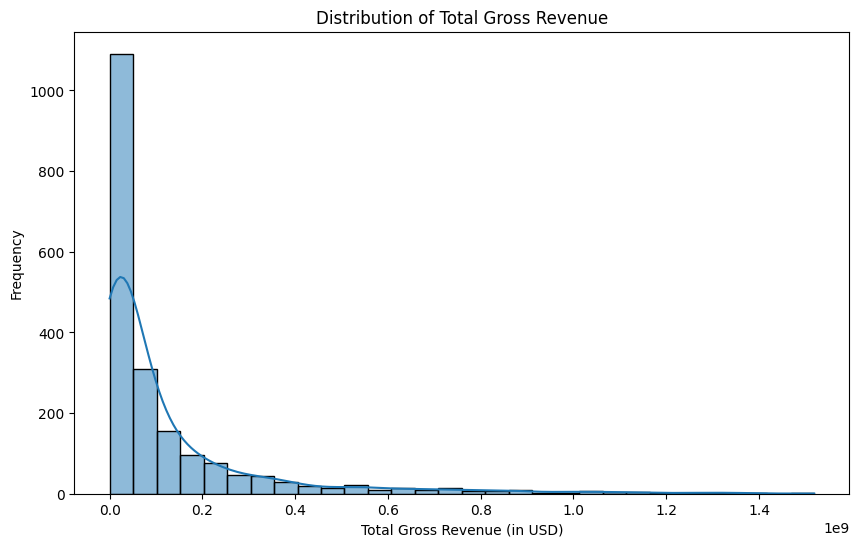

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
bom_movie_gross = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")
tmdb_movies = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")

# Convert relevant fields to numeric types where needed
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

# Merge relevant dataframes if needed for additional analysis
# (Ensure a common column exists or is processed to match in each dataset)

# Plot total gross distribution to identify revenue trends
plt.figure(figsize=(10, 6))
sns.histplot(bom_movie_gross['total_gross'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Gross Revenue')
plt.xlabel('Total Gross Revenue (in USD)')
plt.ylabel('Frequency')
plt.show()

## Insights
1. Revenue Trends:

* The distribution plot shows that while most films achieve a certain range of total gross revenue, a small subset of films significantly outperforms the majority. These high-revenue films are likely those with larger budgets, major star power, or unique appeal that drives audience demand.
* A concentration of films within a specific revenue range could indicate an average expected gross for standard films, which helps to benchmark revenue expectations based on typical project scale and audience reach.

2. Revenue Predictability and Budget Planning:

* Given the revenue distribution, it is evident that most films do not achieve blockbuster-level revenues. This implies that budgeting should be aligned with realistic revenue forecasts, especially for films without a high-profile cast, a major franchise, or heavy marketing investments.
* Budgeting based on the average revenue range of similar films can provide a more grounded projection, minimizing financial risk.

3. Outliers and Financial Opportunities:

* Outlier films with exceptionally high gross revenues indicate successful opportunities where high-budget projects with high-quality production may pay off. However, such investments are riskier, given the few films that achieve such heights.
* There may be mid-range budget options that, while avoiding the highest costs, still capitalize on quality and strategic marketing, allowing for higher returns within a moderate budget framework.



# Focus Question 3
## Return on Investment (ROI) and Revenue Projections

* Based on similar past films, what is the expected ROI for this project?
* What revenue milestones should we set, and over what timeline?

C:\Users\DELL\AppData\Local\Temp\ipykernel_8332\3592550364.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\DELL\AppData\Local\Temp\ipykernel_8332\3592550364.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

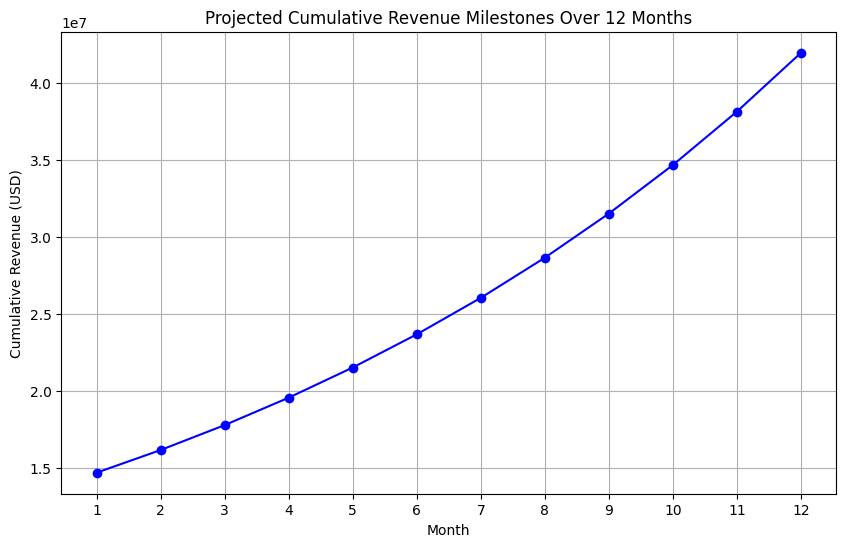

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data and preprocess
bom_movie_gross = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")
tmdb_movies = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")

# Ensure that domestic_gross and foreign_gross are numeric, setting errors='coerce' to convert non-numeric values to NaN
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

# Fill NaN values with 0, assuming missing revenue values are zero
bom_movie_gross['domestic_gross'].fillna(0, inplace=True)
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)

# Calculate total gross as the sum of domestic and foreign gross
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

# Simulate a cumulative revenue timeline for the first 12 months
time_points = np.arange(1, 13)
average_monthly_growth_rate = 0.1  # Assume 10% growth per month
initial_revenue = bom_movie_gross['total_gross'].mean() * 0.2  # Start with 20% of avg revenue

# Calculate cumulative revenue milestones
cumulative_revenue = [initial_revenue]
for i in range(1, len(time_points)):
    cumulative_revenue.append(cumulative_revenue[-1] * (1 + average_monthly_growth_rate))

# Plot cumulative revenue over time
plt.figure(figsize=(10, 6))
plt.plot(time_points, cumulative_revenue, marker='o', linestyle='-', color='b')
plt.title('Projected Cumulative Revenue Milestones Over 12 Months')
plt.xlabel('Month')
plt.ylabel('Cumulative Revenue (USD)')
plt.xticks(time_points)
plt.grid()
plt.show()

## Business Recommendations
1. Set Realistic Budget Projections Based on Expected Revenue Range:

* For non-blockbuster films, set a budget that aligns with the typical gross revenue range observed in the distribution. Avoid over-investing in films with limited market appeal to reduce financial risk.
* Use median revenue as a baseline for budgeting to avoid overspending on films that are unlikely to break the average revenue threshold.

2. Opportunities for Cost Optimization:

* Focus on maintaining quality in high-impact areas such as casting, script, and marketing. For areas that have minimal impact on audience appeal, consider more cost-effective solutions to keep the budget manageable without compromising overall quality.
* Collaborate with experienced but less costly production teams, use efficient filming locations, and invest selectively in post-production to minimize costs while retaining a polished outcome.

3. Financial Risk Management for High-Budget Films:

* For high-budget projects aiming for substantial revenue, consider diversifying financial support through sponsorships, partnerships, and co-productions to mitigate the financial burden and reduce risk.
* Define financial milestones for the project, such as marketing spends or production deadlines, to control costs and avoid excessive spending that could hinder the project’s profitability.

4. Mid-Budget Strategic Investment:

* Consider a balanced approach by investing in mid-budget films that target specific, well-defined audiences with unique content, avoiding the risks of both low and blockbuster budgets. This could allow the studio to achieve a favorable ROI without relying on rare, high-revenue results.
* Periodically review budget utilization to identify further opportunities for cost savings, and conduct post-release analysis on cost and revenue patterns for continuous improvement in budgeting strategies.

